In [142]:
import sys; sys.path.append("..")
from epi_model import *

In [143]:
#my_fn = '2000 raw_stats-alph=0.1-high school2.pickle'

In [144]:
tnet = temporalNetwork.load('high school').range(1,2)

# params

In [5]:
daily_aranges = [0.05, 0.1, 0.15, 0.2]

In [11]:
params.covid_estimate

{'s2e': 0.0006, 'e2i': 2.3148148148148147e-05, 'i2r': 1.6534391534391536e-05}

In [104]:
ms_none = []

In [105]:
S2E = 0.2

p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, S2E)
sim = simulations.SEIR_daily(tnet, p)

for i in range( 300 - len(ms_none) ):
    if (i+1)%20 == 0:
        print("simulation %s" % (i+1))

    sim.init_attributes()

    for who in sample([x for x in range(tnet.Nnodes) if not sim.vacc[x]], 20):
        sim.state_change(who, 'inf')

    sim.run(100)
    ms_none.append( sim.meas )

simulation 20
simulation 40
simulation 60
simulation 80
simulation 100
simulation 120
simulation 140
simulation 160
simulation 180
simulation 200
simulation 220
simulation 240
simulation 260
simulation 280
simulation 300


In [106]:
ms = ms_none

In [58]:
mean_trend = [
    np.mean( [sum(ms[i][typ][j] for typ in {'rec','inf'}) for i in range(len(ms))] )
    for j in range(100)
]

Text(0.5, 0, 'days')

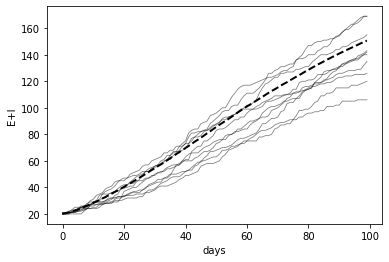

In [59]:
for i in range(10):
    plt.plot( np.array(ms[i]['rec'])+np.array(ms[i]['inf']), color='black', alpha=0.5, linewidth=0.8 )
plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')
    
plt.ylabel("E+I")
plt.xlabel("days")    

In [60]:
mean_trend = [
    np.mean( [sum(ms[i][typ][j] for typ in {'rec','inf','exp'}) for i in range(len(ms))] )
    for j in range(100)
]

Text(0.5, 0, 'days')

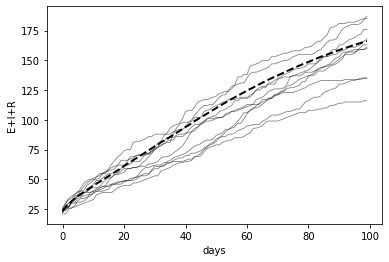

In [61]:
for i in range(10):
    plt.plot( np.array(ms[i]['rec'])+np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.8 )
plt.ylabel("E+I+R")
plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

plt.xlabel("days")    

Text(0.5, 0, 'days')

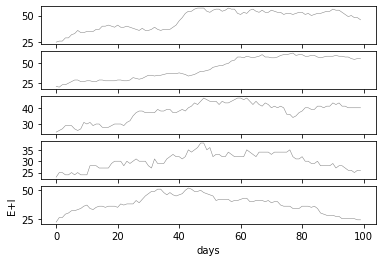

In [46]:
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot( np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.5 )
plt.ylabel("E+I")

plt.xlabel("days")    

Text(0.5, 0, 'days')

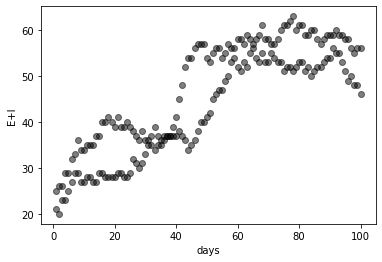

In [47]:
for i in range(2):
    plt.scatter( range(1,len(ms[i]['inf'])+1), np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5 )
plt.ylabel("E+I")

plt.xlabel("days")    

In [62]:
import seaborn as sb

In [68]:
pal = sb.color_palette("Set1")

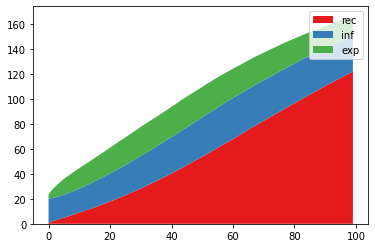

In [73]:
types = ['rec','inf','exp']
plt.stackplot(range(100), *[ [
    np.mean( [ms[i][typ][j] for i in range(len(ms))] )
    for j in range(100)
] for typ in types ], colors=pal, labels=types)
plt.legend();

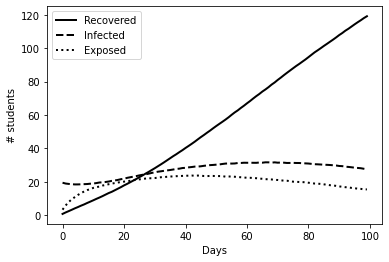

In [156]:
ls = ['-','--','dotted']
typ_dict = {
    'rec':'Recovered',
    'inf':'Infected',
    'exp':'Exposed'
}

for i,trend in enumerate([ [
    np.mean( [ms_none[i][typ][j] for i in range(len(ms_none))] )
    for j in range(100)
] for typ in types ]):
    plt.plot(trend, label=typ_dict[types[i]], color='black', linewidth=2, linestyle=ls[i])

plt.xlabel("Days");
plt.ylabel("# students")
    
plt.legend();

In [ ]:
def summarize(ms, mod='add mod=...'):

    mean_trend = [
        np.mean( [sum(ms[i][typ][j] for typ in {'rec','inf'}) for i in range(len(ms))] )
        for j in range(100)
    ]

    for i in range(10):
        plt.plot( np.array(ms[i]['rec'])+np.array(ms[i]['inf']), color='black', alpha=0.5, linewidth=0.8 )
    plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

    plt.ylabel("E+I")
    plt.xlabel("days")    
    plt.title('E+I over time, 10 simulations, '+mod)
    plt.show()

    mean_trend = [
        np.mean( [sum(ms[i][typ][j] for typ in {'rec','inf','exp'}) for i in range(len(ms))] )
        for j in range(100)
    ]

    for i in range(10):
        plt.plot( np.array(ms[i]['rec'])+np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.8 )
    plt.ylabel("E+I+R")
    plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

    plt.xlabel("days")    
    plt.title('E+I+R over time, 10 simulations, '+mod)
    plt.show()

    for i in range(5):
        plt.subplot(5,1,i+1)
        plt.plot( np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.5 )
    plt.ylabel('E+I')
    plt.title("E+I over time, 5 simulations, "+mod)

    plt.xlabel("days")    
    plt.show()

    for i in range(2):
        plt.scatter( range(1,len(ms[i]['inf'])+1), np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5 )
    plt.ylabel("E+I")

    plt.xlabel("days")    
    plt.title("E+I over time, 2 simulations, "+mod)
    
    plt.show()

    import seaborn as sb

    pal = sb.color_palette("Set1")

    types = ['rec','inf','exp']
    plt.stackplot(range(100), *[ [
        np.mean( [ms[i][typ][j] for i in range(len(ms))] )
        for j in range(100)
    ] for typ in types ], colors=pal, labels=types)
    plt.legend();
    plt.title("average infection spread, 300 simulations, "+mod)
    plt.show()

    ls = ['-','--','dotted']

    for i,trend in enumerate([ [
        np.mean( [ms[i][typ][j] for i in range(len(ms))] )
        for j in range(100)
    ] for typ in types ]):
        if i==0:
            plt.title("average infection spread, 300 simulations, "+mod)
        plt.plot(trend, label=types[i], color='black', linewidth=2, linestyle=ls[i])

    plt.legend();
    plt.show()

# randomly vaccinated graphs?

In [107]:
ms_random = []

In [108]:
S2E = 0.2

p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, S2E)
sim = simulations.SEIR_daily(tnet, p)

for i in range( 300 - len(ms_random) ):
    if (i+1)%20 == 0:
        print("simulation %s" % (i+1))

    sim.init_attributes()
    to_vacc = sampling.rand(sim, vaccinateN=int(tnet.Nnodes*0.1))
    for x in to_vacc:
        sim.state_change(x, 'vacc')

    for who in sample([x for x in range(tnet.Nnodes) if not sim.vacc[x]], 20):
        sim.state_change(who, 'inf')

    sim.run(100)
    ms_random.append( sim.meas )

simulation 20
simulation 40
simulation 60
simulation 80
simulation 100
simulation 120
simulation 140
simulation 160
simulation 180
simulation 200
simulation 220
simulation 240
simulation 260
simulation 280
simulation 300


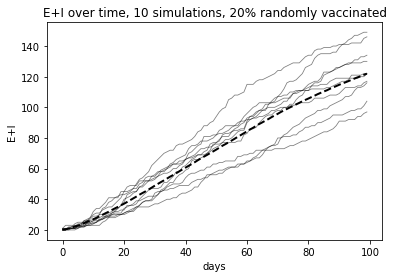

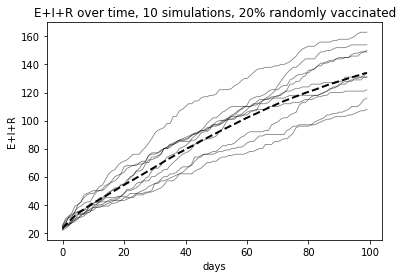

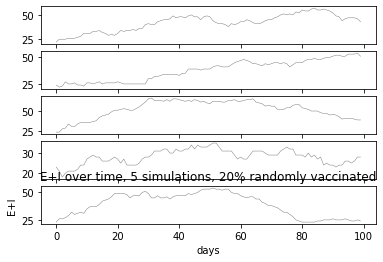

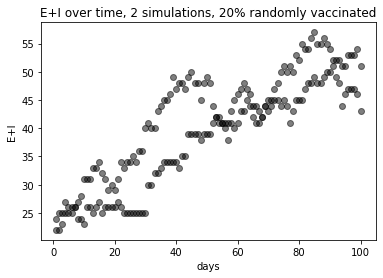

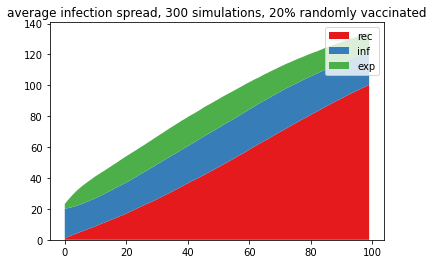

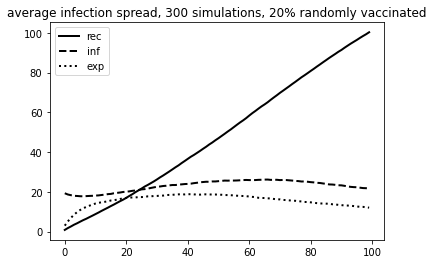

In [109]:
summarize(ms_random, '20% randomly vaccinated')

# vaccinate strategically

In [99]:
ms_strategic = []

In [101]:
S2E = 0.2

p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, S2E)
sim = simulations.SEIR_daily(tnet, p)

for i in range( 300 - len(ms_strategic) ):
    if (i+1)%20 == 0:
        print("simulation %s" % (i+1))

    sim.init_attributes()
    to_vacc = sampling.friendHighDeg(sim, vaccinateN=int(tnet.Nnodes*0.1))
    for x in to_vacc:
        sim.state_change(x, 'vacc')

    for who in sample([x for x in range(tnet.Nnodes) if not sim.vacc[x]], 20):
        sim.state_change(who, 'inf')

    sim.run(100)
    ms_strategic.append( sim.meas )

simulation 20
simulation 40
simulation 60
simulation 80
simulation 100
simulation 120
simulation 140
simulation 160
simulation 180
simulation 200
simulation 220
simulation 240
simulation 260
simulation 280
simulation 300


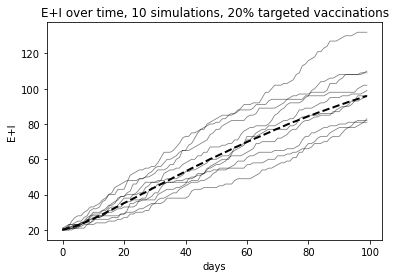

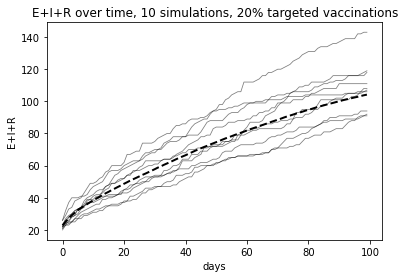

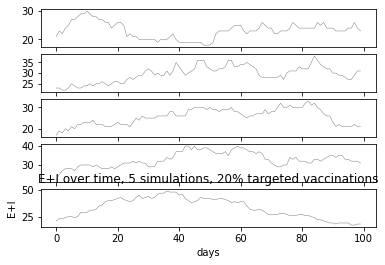

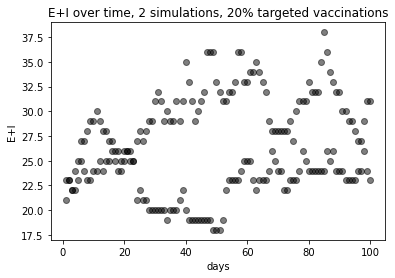

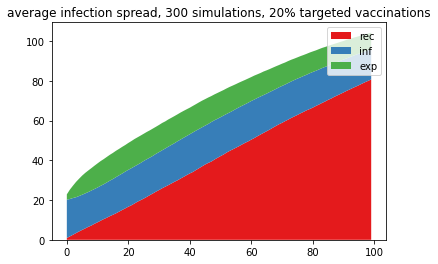

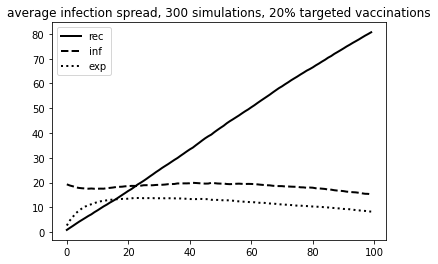

In [102]:
summarize(ms_strategic, '20% targeted vaccinations')

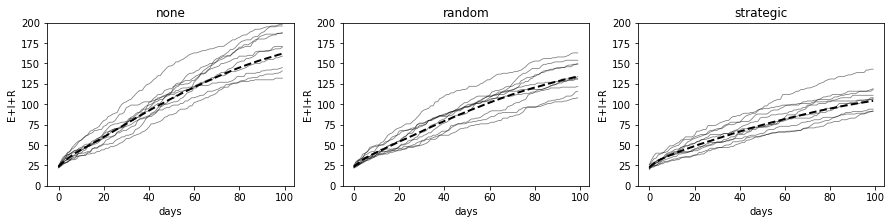

In [116]:
plt.figure(figsize=(15,3))
mss = [ms_none, ms_random, ms_strategic]
msname = ['none','random','strategic']
for i,(ms,name) in enumerate(zip(mss,msname)):
    plt.subplot(1,3,i+1)
    plt.title(name)
    mean_trend = [
        np.mean( [sum(ms[i][typ][j] for typ in {'rec','inf','exp'}) for i in range(len(ms))] )
        for j in range(100)
    ]

    for i in range(10):
        plt.plot( np.array(ms[i]['rec'])+np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.8 )
    plt.ylabel("E+I+R")
    plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

    plt.xlabel("days")
    plt.ylim(0,200)
plt.show()

# 20% 

In [101]:
S2E = 0.2

p = dict(params.covid_estimate)
p['s2e'] = params.daily_to_momentary(tnet, S2E)
sim = simulations.SEIR_daily(tnet, p)

In [134]:
ms_20 = defaultdict(list)

In [151]:
ms_20.keys()

dict_keys(['rand', 'friendHighDeg', 'random', 'strategic'])

In [150]:
len(ms_20)

4

In [135]:
for method in [sampling.rand, sampling.friendHighDeg]:

    for i in range( 300 - len(ms_20[method.__name__]) ):
        if (i+1)%20 == 0:
            print("simulation %s" % (i+1))

        sim.init_attributes()
        to_vacc = method(sim, vaccinateN=int(tnet.Nnodes*0.2))
        for x in to_vacc:
            sim.state_change(x, 'vacc')

        for who in sample([x for x in range(tnet.Nnodes) if not sim.vacc[x]], 20):
            sim.state_change(who, 'inf')

        sim.run(100)
        ms_20[method.__name__].append( sim.meas )

simulation 20
simulation 40
simulation 60
simulation 80
simulation 100
simulation 120
simulation 140
simulation 160
simulation 180
simulation 200
simulation 220
simulation 240
simulation 260
simulation 280
simulation 300
simulation 20
simulation 40
simulation 60
simulation 80
simulation 100
simulation 120
simulation 140
simulation 160
simulation 180
simulation 200
simulation 220
simulation 240
simulation 260
simulation 280
simulation 300


# awesome summary

In [145]:
list(ms_20)

['rand', 'friendHighDeg']

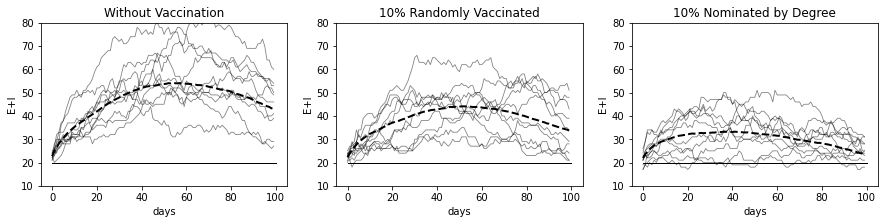

In [146]:
plt.figure(figsize=(15,3))
mss = [ms_none, ms_random, ms_strategic]
msname = ['Without Vaccination','10% Randomly Vaccinated','10% Nominated by Degree']
for i,(ms,name) in enumerate(zip(mss,msname)):
    plt.subplot(1,3,i+1)
    plt.title(name)
    mean_trend = [
        np.mean( [sum(ms[i][typ][j] for typ in {'inf','exp'}) for i in range(len(ms))] )
        for j in range(100)
    ]

    for i in range(10):
        plt.plot( np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.8 )
    plt.ylabel("E+I")
    plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

    plt.xlabel("days")
    plt.ylim(10,80)
    
    plt.plot([0,100],[20,20], color='black', linewidth=1)
    
plt.show()

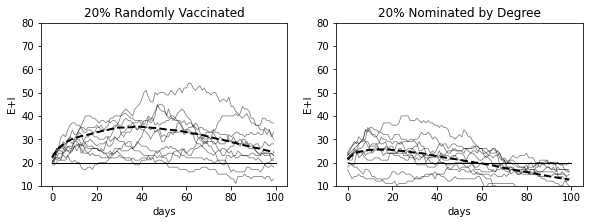

In [154]:
plt.figure(figsize=(15,3))
mss = [ms_20['rand'], ms_20['friendHighDeg']]
msname = ['20% Randomly Vaccinated','20% Nominated by Degree']
for i,(ms,name) in enumerate(zip(mss,msname)):
    plt.subplot(1,3,i+1)
    plt.title(name)
    mean_trend = [
        np.mean( [sum(ms[i][typ][j] for typ in {'inf','exp'}) for i in range(len(ms))] )
        for j in range(100)
    ]

    for i in range(10):
        plt.plot( np.array(ms[i]['inf'])+np.array(ms[i]['exp']), color='black', alpha=0.5, linewidth=0.8 )
    plt.ylabel("E+I")
    plt.plot(mean_trend, linewidth=2, color='black', linestyle='--')

    plt.xlabel("days")
    plt.ylim(10,80)
    
    plt.plot([0,100],[20,20], color='black', linewidth=1)
    
plt.show()

# new stuff

In [136]:
if True:
    import pickle
    with open('G:\\My Drive\\2020 ORGANISATION\\0. right now right now\\31 disease contact spread\\0.1 analysis\\2.1c full_run_new.pickle', 'rb') as inf:
        ms = pickle.load( inf )